# **Part 1 : @Pr EL ASRI**

## **1. Data visualization and exploration to better understand our dataset**

In [14]:
# data manipulation
import pandas as pd
import numpy as np
from operator import itemgetter 
import missingno as msno 
import datetime as dt

# visualiation
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# model training
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# classifiers
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.tree import DecisionTreeClassifier # decision Tree


# metrics
from sklearn.metrics import f1_score # F1-score
from sklearn.metrics import confusion_matrix # Confusion matrix

In [2]:
# Read in the dataset
data = pd.read_csv('dataset_car_auction.csv',sep=";")

In [3]:
data

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Color,Transmission,WheelTypeID,WheelType,...,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNZIP1,VNST,WarrantyCost,VehBCost,IsBadBuy
0,326,10/25/2010,ADESA,2008,2,KIA,BLUE,AUTO,2.0,Covers,...,10805.0,6628.0,7535.0,9605.0,10650.0,33619,FL,533,6100.0,1
1,42991,5/27/2009,MANHEIM,2006,3,DODGE,SILVER,AUTO,2.0,Covers,...,7478.0,5480.0,6461.0,6418.0,7478.0,32124,FL,1630,4000.0,0
2,55273,3/18/2010,OTHER,2008,2,DODGE,BLACK,AUTO,2.0,Covers,...,11652.0,7497.0,8102.0,10721.0,11350.0,74135,OK,693,7500.0,0
3,29058,06/08/2009,OTHER,2005,4,FORD,BROWN,AUTO,2.0,Covers,...,7691.0,4817.0,6658.0,5702.0,7691.0,85018,AZ,1633,4725.0,0
4,34991,03/04/2009,MANHEIM,2005,4,CHRYSLER,BLUE,AUTO,1.0,Alloy,...,7664.0,5370.0,6811.0,6300.0,7856.0,75236,TX,1623,5670.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58381,20065,03/09/2010,OTHER,2007,3,CHEVROLET,RED,AUTO,1.0,Alloy,...,13762.0,8043.0,9560.0,11325.0,12762.0,95673,CA,1974,7205.0,0
58382,12550,1/26/2010,OTHER,2006,4,FORD,GOLD,AUTO,1.0,Alloy,...,9145.0,4661.0,5634.0,8401.0,9193.0,95673,CA,1155,4690.0,0
58383,15626,10/28/2010,OTHER,2007,3,CHEVROLET,SILVER,AUTO,2.0,Covers,...,12303.0,7421.0,8642.0,10120.0,11695.0,21014,MD,1703,7000.0,0
58384,21224,12/01/2010,MANHEIM,2005,5,NISSAN,GOLD,AUTO,1.0,Alloy,...,8696.0,4065.0,5066.0,7179.0,8436.0,75236,TX,594,5525.0,1


In [4]:
# Print data types of DataFrame
data.dtypes

RefId                                  int64
PurchDate                             object
Auction                               object
VehYear                                int64
VehicleAge                             int64
Make                                  object
Color                                 object
Transmission                          object
WheelTypeID                          float64
WheelType                             object
VehOdo                                 int64
Size                                  object
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
MMRAcquisitonRetailCleanPrice        float64
MMRCurrentAuctionAveragePrice        float64
MMRCurrentAuctionCleanPrice          float64
MMRCurrentRetailAveragePrice         float64
MMRCurrentRetailCleanPrice           float64
VNZIP1                                 int64
VNST                                  object
WarrantyCo

### **a. Plot Distribution of vehicle age**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


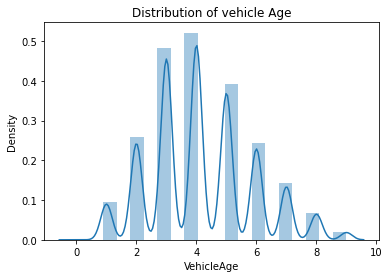

In [5]:
sb.distplot(data['VehicleAge'], bins = 20)
plt.title('Distribution of vehicle Age')
plt.show()


### **b. Plot Distribution of the target variable IsBadBuy**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


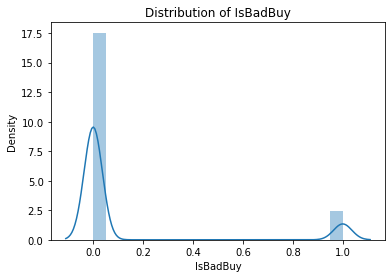

In [6]:
sb.distplot(data['IsBadBuy'], bins = 20)
plt.title('Distribution of IsBadBuy')
plt.show()

datasetcounts 20 records(total  amount  of  cars),  of  which 2.5 have been  returned  as  bad  purchases , while the remaining 17.5% are good buys

### **c. Investigate the attribute VehBCost**


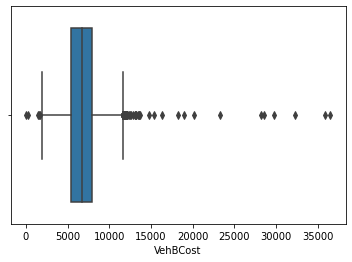

In [7]:
ax = sb.boxplot(x=data["VehBCost"])


we can observe that Vehicles are usually sold for a price between 5000 and 7500, and a very low percentage of cars is sold above 1750 or below 2500

### **d. Plot the distribution of the attribute Color**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

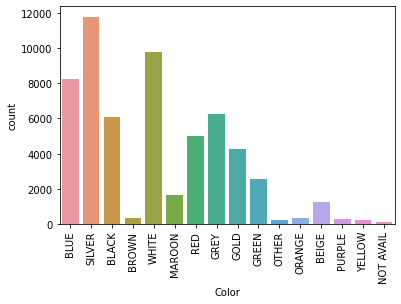

In [8]:
g=sb.countplot('Color',data=data)
plt.xticks(rotation=90)

the most tree common colours are SILVER,WHITE & BLUE.

### **e. Choose tree other features to explore**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


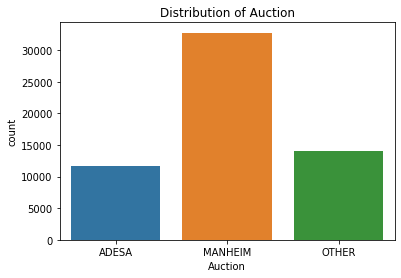

In [8]:
sb.countplot(data['Auction'])
plt.title('Distribution of Auction')
plt.show()

We observe that MANHEIM is the auction that provides the most auctions  in comparaison with ADESA and other providers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

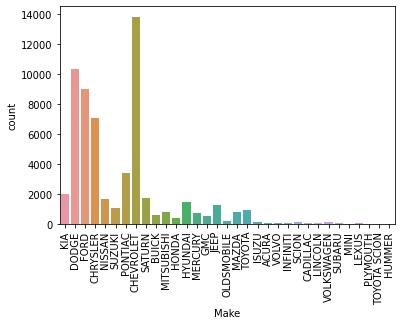

In [9]:
g=sb.countplot('Make',data=data)
plt.xticks(rotation=90)

The distribution of attribute values for manufacturers presents a preponderance of automobiles a Chevrolet brand, followed by Dodge, Ford and Chrysler. American cars are the majority

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


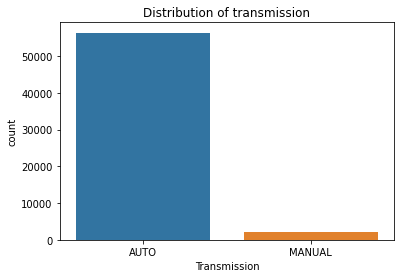

In [10]:
sb.countplot(data['Transmission'])
plt.title('Distribution of transmission')
plt.show()

We can observe that most of the vehicles have AUTO transmission.

### **f. Plot correlation matrix between numerical features**

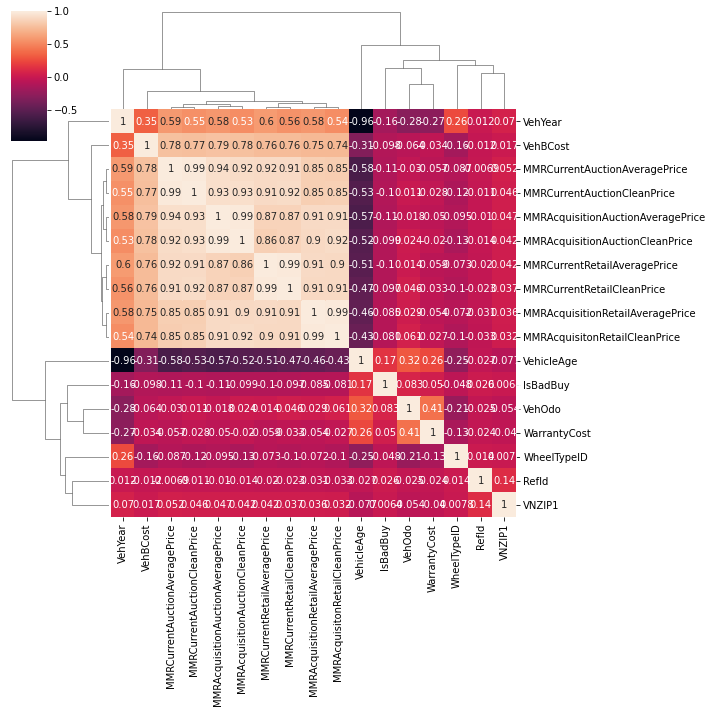

In [10]:
num_co=data.drop(columns=['PurchDate','Auction','Make','Color','Transmission','WheelType','Size','VNST'])
num_co.head()
sb.clustermap(data.corr(), annot=True)

## **2.Missing value imputation**


### **a. Check for duplicate RefId and remove them**

In [11]:
duplicates = data.duplicated(subset = 'RefId', keep = False)
duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
58381    False
58382    False
58383    False
58384    False
58385    False
Length: 58386, dtype: bool

In [12]:
data[duplicates].sort_values('RefId')

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Color,Transmission,WheelTypeID,WheelType,...,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNZIP1,VNST,WarrantyCost,VehBCost,IsBadBuy


In [ ]:
# drop duplicates
data.drop_duplicates()

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Color,Transmission,WheelTypeID,WheelType,...,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNZIP1,VNST,WarrantyCost,VehBCost,IsBadBuy
0,326,10/25/2010,ADESA,2008,2,KIA,BLUE,AUTO,2.0,Covers,...,10805.0,6628.0,7535.0,9605.0,10650.0,33619,FL,533,6100.0,1
1,42991,5/27/2009,MANHEIM,2006,3,DODGE,SILVER,AUTO,2.0,Covers,...,7478.0,5480.0,6461.0,6418.0,7478.0,32124,FL,1630,4000.0,0
2,55273,3/18/2010,OTHER,2008,2,DODGE,BLACK,AUTO,2.0,Covers,...,11652.0,7497.0,8102.0,10721.0,11350.0,74135,OK,693,7500.0,0
3,29058,06/08/2009,OTHER,2005,4,FORD,BROWN,AUTO,2.0,Covers,...,7691.0,4817.0,6658.0,5702.0,7691.0,85018,AZ,1633,4725.0,0
4,34991,03/04/2009,MANHEIM,2005,4,CHRYSLER,BLUE,AUTO,1.0,Alloy,...,7664.0,5370.0,6811.0,6300.0,7856.0,75236,TX,1623,5670.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58381,20065,03/09/2010,OTHER,2007,3,CHEVROLET,RED,AUTO,1.0,Alloy,...,13762.0,8043.0,9560.0,11325.0,12762.0,95673,CA,1974,7205.0,0
58382,12550,1/26/2010,OTHER,2006,4,FORD,GOLD,AUTO,1.0,Alloy,...,9145.0,4661.0,5634.0,8401.0,9193.0,95673,CA,1155,4690.0,0
58383,15626,10/28/2010,OTHER,2007,3,CHEVROLET,SILVER,AUTO,2.0,Covers,...,12303.0,7421.0,8642.0,10120.0,11695.0,21014,MD,1703,7000.0,0
58384,21224,12/01/2010,MANHEIM,2005,5,NISSAN,GOLD,AUTO,1.0,Alloy,...,8696.0,4065.0,5066.0,7179.0,8436.0,75236,TX,594,5525.0,1


### **b. Quantify missing values**

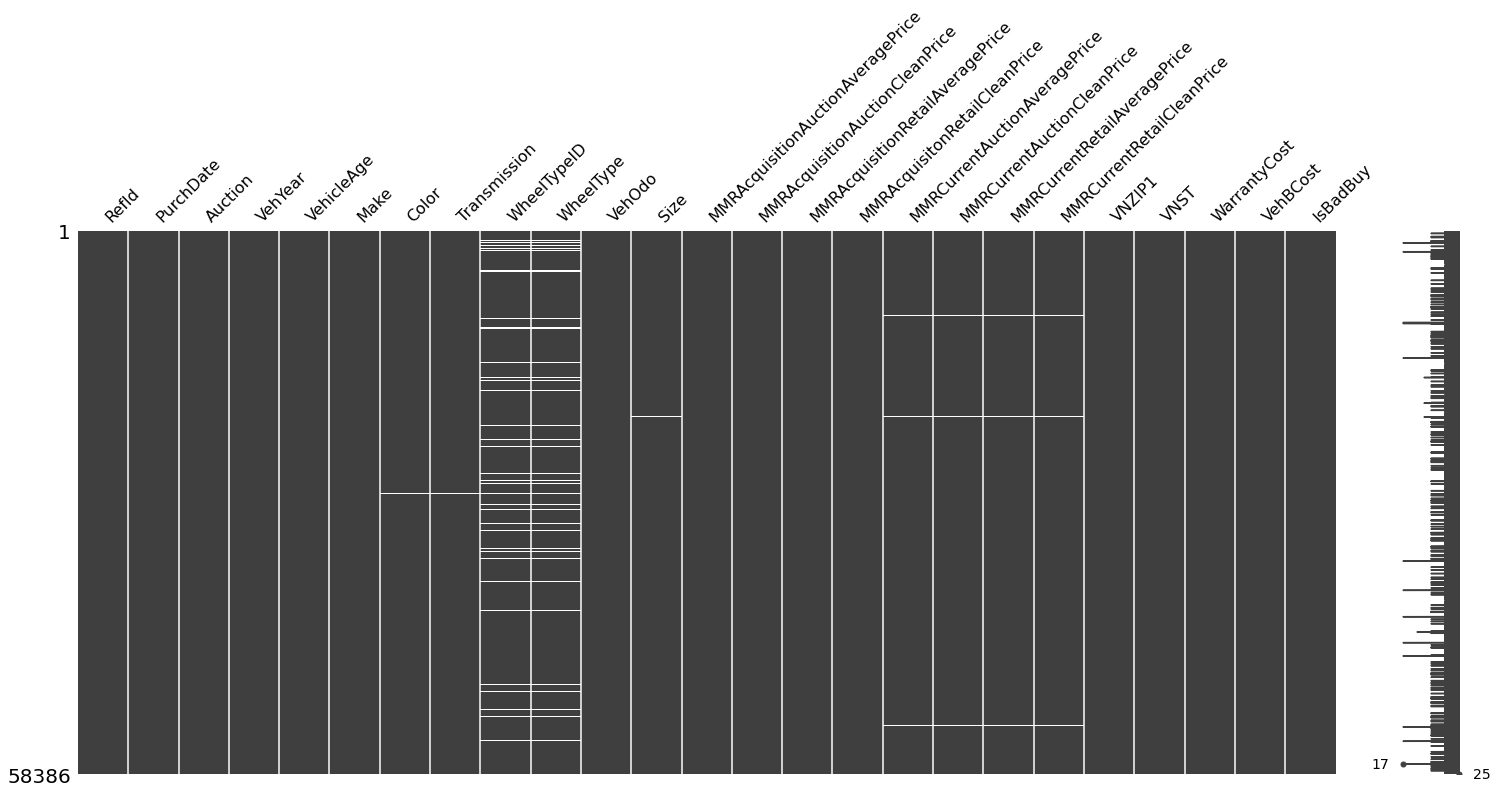

In [15]:
import missingno as msno 
msno.matrix(data)
plt.show()

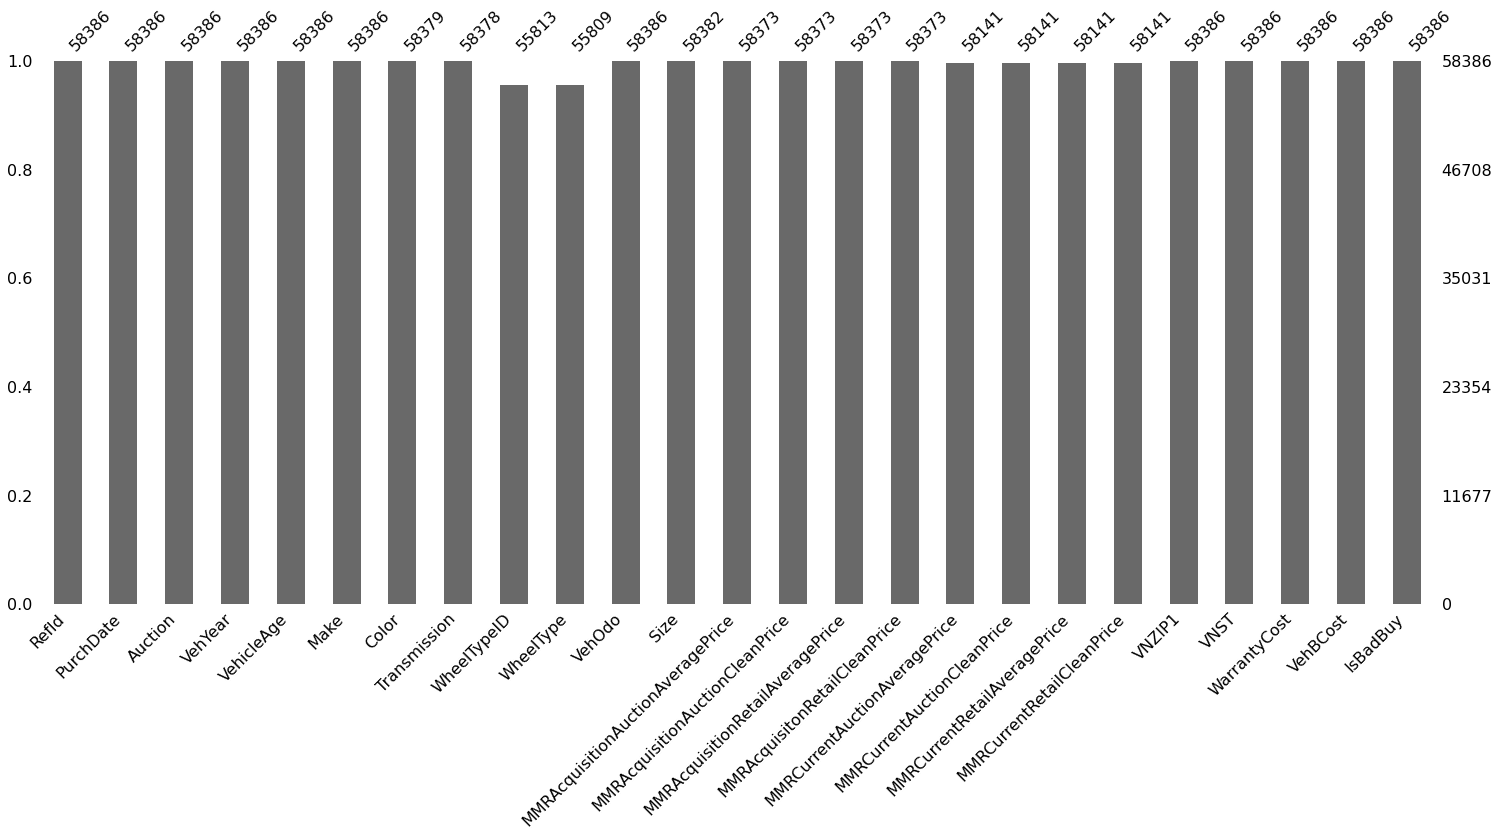

In [17]:
# Missingness barplot
msno.bar(data)

In [18]:
data.isna().sum()

RefId                                   0
PurchDate                               0
Auction                                 0
VehYear                                 0
VehicleAge                              0
Make                                    0
Color                                   7
Transmission                            8
WheelTypeID                          2573
WheelType                            2577
VehOdo                                  0
Size                                    4
MMRAcquisitionAuctionAveragePrice      13
MMRAcquisitionAuctionCleanPrice        13
MMRAcquisitionRetailAveragePrice       13
MMRAcquisitonRetailCleanPrice          13
MMRCurrentAuctionAveragePrice         245
MMRCurrentAuctionCleanPrice           245
MMRCurrentRetailAveragePrice          245
MMRCurrentRetailCleanPrice            245
VNZIP1                                  0
VNST                                    0
WarrantyCost                            0
VehBCost                          

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58386 entries, 0 to 58385
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              58386 non-null  int64  
 1   PurchDate                          58386 non-null  object 
 2   Auction                            58386 non-null  object 
 3   VehYear                            58386 non-null  int64  
 4   VehicleAge                         58386 non-null  int64  
 5   Make                               58386 non-null  object 
 6   Color                              58379 non-null  object 
 7   Transmission                       58378 non-null  object 
 8   WheelTypeID                        55813 non-null  float64
 9   WheelType                          55809 non-null  object 
 10  VehOdo                             58386 non-null  int64  
 11  Size                               58382 non-null  obj

In [20]:
data['MMRCurrentRetailCleanPrice'] = data['MMRCurrentRetailCleanPrice'].fillna(data['MMRCurrentRetailCleanPrice'].mean())
data['MMRCurrentRetailAveragePrice'] = data['MMRCurrentRetailAveragePrice'].fillna(data['MMRCurrentRetailAveragePrice'].mean())
data['MMRCurrentAuctionCleanPrice'] = data['MMRCurrentAuctionCleanPrice'].fillna(data['MMRCurrentAuctionCleanPrice'].mean())
data['MMRCurrentAuctionAveragePrice'] = data['MMRCurrentAuctionAveragePrice'].fillna(data['MMRCurrentAuctionAveragePrice'].mean())
data['MMRAcquisitonRetailCleanPrice'] = data['MMRAcquisitonRetailCleanPrice'].fillna(data['MMRAcquisitonRetailCleanPrice'].mean())
data['MMRAcquisitionRetailAveragePrice'] = data['MMRAcquisitionRetailAveragePrice'].fillna(data['MMRAcquisitionRetailAveragePrice'].mean())
data['MMRAcquisitionAuctionCleanPrice'] = data['MMRAcquisitionAuctionCleanPrice'].fillna(data['MMRAcquisitionAuctionCleanPrice'].mean())
data['MMRAcquisitionAuctionAveragePrice'] = data['MMRAcquisitionAuctionAveragePrice'].fillna(data['MMRAcquisitionAuctionAveragePrice'].mean())
data['WheelTypeID'] = data['WheelTypeID'].fillna(data['WheelTypeID'].mean())



In [21]:
data.isna().sum()

RefId                                   0
PurchDate                               0
Auction                                 0
VehYear                                 0
VehicleAge                              0
Make                                    0
Color                                   7
Transmission                            8
WheelTypeID                             0
WheelType                            2577
VehOdo                                  0
Size                                    4
MMRAcquisitionAuctionAveragePrice       0
MMRAcquisitionAuctionCleanPrice         0
MMRAcquisitionRetailAveragePrice        0
MMRAcquisitonRetailCleanPrice           0
MMRCurrentAuctionAveragePrice           0
MMRCurrentAuctionCleanPrice             0
MMRCurrentRetailAveragePrice            0
MMRCurrentRetailCleanPrice              0
VNZIP1                                  0
VNST                                    0
WarrantyCost                            0
VehBCost                          

### **c. Perform mean value imputation for all numerical features and frequent occurring value for categorical features.**

In [22]:
cols = ["Color", "Size","WheelType","Transmission"]
data[cols]=data[cols].fillna(data.mode().iloc[0])

In [23]:
data.isna().sum()

RefId                                0
PurchDate                            0
Auction                              0
VehYear                              0
VehicleAge                           0
Make                                 0
Color                                0
Transmission                         0
WheelTypeID                          0
WheelType                            0
VehOdo                               0
Size                                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
VNZIP1                               0
VNST                                 0
WarrantyCost                         0
VehBCost                             0
IsBadBuy                             0
dtype: int64

## **3. Feature Engineering**

### **a. Remove unnecessary attributes**

In [24]:
data.drop(["RefId","WheelTypeID","VehYear","VNZIP1"], axis=1, inplace=True)
data

,PurchDate,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Size,MMRAcquisitionAuctionAveragePrice,...,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,WarrantyCost,VehBCost,IsBadBuy
0,10/25/2010,ADESA,2,KIA,BLUE,AUTO,Covers,61184,MEDIUM,6796.0,...,10140.0,10805.0,6628.0,7535.0,9605.0,10650.0,FL,533,6100.0,1
1,5/27/2009,MANHEIM,3,DODGE,SILVER,AUTO,Covers,92383,MEDIUM,5480.0,...,6418.0,7478.0,5480.0,6461.0,6418.0,7478.0,FL,1630,4000.0,0
2,3/18/2010,OTHER,2,DODGE,BLACK,AUTO,Covers,45965,MEDIUM,8067.0,...,11073.0,11652.0,7497.0,8102.0,10721.0,11350.0,OK,693,7500.0,0
3,06/08/2009,OTHER,4,FORD,BROWN,AUTO,Covers,80169,VAN,4817.0,...,5702.0,7691.0,4817.0,6658.0,5702.0,7691.0,AZ,1633,4725.0,0
4,03/04/2009,MANHEIM,4,CHRYSLER,BLUE,AUTO,Alloy,77372,VAN,5430.0,...,6364.0,7664.0,5370.0,6811.0,6300.0,7856.0,TX,1623,5670.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58381,03/09/2010,OTHER,3,CHEVROLET,RED,AUTO,Alloy,78226,LARGE,8081.0,...,11947.0,13762.0,8043.0,9560.0,11325.0,12762.0,CA,1974,7205.0,0
58382,1/26/2010,OTHER,4,FORD,GOLD,AUTO,Alloy,71169,COMPACT,4411.0,...,8377.0,9145.0,4661.0,5634.0,8401.0,9193.0,CA,1155,4690.0,0
58383,10/28/2010,OTHER,3,CHEVROLET,SILVER,AUTO,Covers,69795,LARGE,7575.0,...,11092.0,12303.0,7421.0,8642.0,10120.0,11695.0,MD,1703,7000.0,0
58384,12/01/2010,MANHEIM,5,NISSAN,GOLD,AUTO,Alloy,85326,COMPACT,4278.0,...,7790.0,8696.0,4065.0,5066.0,7179.0,8436.0,TX,594,5525.0,1


### **d. Split the purchase date (“purchDate”)**

In [25]:
data['PurchDate']

0        10/25/2010
1         5/27/2009
2         3/18/2010
3        06/08/2009
4        03/04/2009
            ...    
58381    03/09/2010
58382     1/26/2010
58383    10/28/2010
58384    12/01/2010
58385    10/08/2009
Name: PurchDate, Length: 58386, dtype: object

In [26]:
date = data['PurchDate'].str.split("/", expand = True)


In [27]:
data["purch_day"]= date[0]
data["purch_month"]= date[1]
data["purch_year"]= date[2]

In [28]:
data.drop("PurchDate", axis=1, inplace = True)
data


,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Size,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,...,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,WarrantyCost,VehBCost,IsBadBuy,purch_day,purch_month,purch_year
0,ADESA,2,KIA,BLUE,AUTO,Covers,61184,MEDIUM,6796.0,7555.0,...,7535.0,9605.0,10650.0,FL,533,6100.0,1,10,25,2010
1,MANHEIM,3,DODGE,SILVER,AUTO,Covers,92383,MEDIUM,5480.0,6461.0,...,6461.0,6418.0,7478.0,FL,1630,4000.0,0,5,27,2009
2,OTHER,2,DODGE,BLACK,AUTO,Covers,45965,MEDIUM,8067.0,8580.0,...,8102.0,10721.0,11350.0,OK,693,7500.0,0,3,18,2010
3,OTHER,4,FORD,BROWN,AUTO,Covers,80169,VAN,4817.0,6658.0,...,6658.0,5702.0,7691.0,AZ,1633,4725.0,0,06,08,2009
4,MANHEIM,4,CHRYSLER,BLUE,AUTO,Alloy,77372,VAN,5430.0,6633.0,...,6811.0,6300.0,7856.0,TX,1623,5670.0,0,03,04,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58381,OTHER,3,CHEVROLET,RED,AUTO,Alloy,78226,LARGE,8081.0,9822.0,...,9560.0,11325.0,12762.0,CA,1974,7205.0,0,03,09,2010
58382,OTHER,4,FORD,GOLD,AUTO,Alloy,71169,COMPACT,4411.0,5310.0,...,5634.0,8401.0,9193.0,CA,1155,4690.0,0,1,26,2010
58383,OTHER,3,CHEVROLET,SILVER,AUTO,Covers,69795,LARGE,7575.0,8746.0,...,8642.0,10120.0,11695.0,MD,1703,7000.0,0,10,28,2010
58384,MANHEIM,5,NISSAN,GOLD,AUTO,Alloy,85326,COMPACT,4278.0,5315.0,...,5066.0,7179.0,8436.0,TX,594,5525.0,1,12,01,2010


we remarque that day , month and year of purchase are objects so we have to transform them into floats

In [29]:
data['purch_day'] = data['purch_day'].astype('float')
data['purch_month'] = data['purch_month'].astype('float')
data['purch_year'] = data['purch_year'].astype('float')

In [30]:
data.dtypes

Auction                               object
VehicleAge                             int64
Make                                  object
Color                                 object
Transmission                          object
WheelType                             object
VehOdo                                 int64
Size                                  object
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
MMRAcquisitonRetailCleanPrice        float64
MMRCurrentAuctionAveragePrice        float64
MMRCurrentAuctionCleanPrice          float64
MMRCurrentRetailAveragePrice         float64
MMRCurrentRetailCleanPrice           float64
VNST                                  object
WarrantyCost                           int64
VehBCost                             float64
IsBadBuy                               int64
purch_day                            float64
purch_month                          float64
purch_year

### **e. Keep only cars where WheelType is in (Alloy, Covers)**

In [32]:
data['WheelType'].unique()

array(['Covers', 'Alloy', 'Special'], dtype=object)

In [33]:
wealType_index = data[ (data['WheelType'] != "Alloy") & (data['WheelType'] != "Covers")].index
data.drop(wealType_index, inplace = True)
data['WheelType']

0        Covers
1        Covers
2        Covers
3        Covers
4         Alloy
          ...  
58381     Alloy
58382     Alloy
58383    Covers
58384     Alloy
58385    Covers
Name: WheelType, Length: 57797, dtype: object

In [34]:
data['WheelType'].unique()

array(['Covers', 'Alloy'], dtype=object)

### **f. Dummy code the categorical features**

In [35]:
data=pd.get_dummies(data=data, columns=['Auction','Make','Color','Transmission','WheelType','Size','VNST'])

### **g. Perform a Standardization to the continuous variables**

In [36]:
data.columns

Index(['VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice',
       ...
       'VNST_OK', 'VNST_OR', 'VNST_PA', 'VNST_SC', 'VNST_TN', 'VNST_TX',
       'VNST_UT', 'VNST_VA', 'VNST_WA', 'VNST_WV'],
      dtype='object', length=121)

In [37]:
data.dtypes

VehicleAge                             int64
VehOdo                                 int64
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
                                      ...   
VNST_TX                                uint8
VNST_UT                                uint8
VNST_VA                                uint8
VNST_WA                                uint8
VNST_WV                                uint8
Length: 121, dtype: object

In [39]:
cols= ["VehicleAge","VehOdo","MMRAcquisitionAuctionAveragePrice","MMRAcquisitionAuctionCleanPrice","MMRAcquisitionRetailAveragePrice","MMRAcquisitonRetailCleanPrice","MMRCurrentAuctionAveragePrice","MMRCurrentAuctionCleanPrice","MMRCurrentRetailAveragePrice","MMRCurrentRetailCleanPrice","WarrantyCost","purch_day","purch_month","purch_year"]
for col in cols:
    data[col] = (data[col] - data[col].mean()) / data[col].std()
data.head()

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,...,VNST_OK,VNST_OR,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,VNST_WV
0,-1.265509,-0.704985,0.271949,0.067087,0.521782,0.282592,0.204558,0.054299,0.269409,0.153418,...,0,0,0,0,0,0,0,0,0,0
1,-0.682100,1.432857,-0.264266,-0.336278,-0.660179,-0.702968,-0.268885,-0.347417,-0.766020,-0.809294,...,0,0,0,0,0,0,0,0,0,0
2,-1.265509,-1.747832,0.789829,0.445011,0.818066,0.533499,0.562940,0.266377,0.631988,0.365870,...,1,0,0,0,0,0,0,0,0,0
3,-0.098690,0.595920,-0.534411,-0.263643,-0.887552,-0.639870,-0.542310,-0.273731,-0.998642,-0.744648,...,0,0,0,0,0,0,0,0,0,0
4,-0.098690,0.404262,-0.284639,-0.272861,-0.677327,-0.647869,-0.314249,-0.216504,-0.804357,-0.694570,...,0,0,0,0,0,1,0,0,0,0


### **h. Report the new shape (number of features)**

In [40]:
data.shape

(57797, 121)

### **i. Apply principal component Analysis(PCA)**

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.values)

In [43]:
scaled_df = pd.DataFrame(scaled_data)

In [44]:
scaled_df

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,-1.265520,-0.704991,0.271952,0.067087,0.521787,0.282594,0.204560,0.054299,0.269411,0.153419,...,-0.229338,-0.052023,-0.10846,-0.249264,-0.158017,-0.478612,-0.110001,-0.153058,-0.043866,-0.061955
1,-0.682106,1.432869,-0.264268,-0.336281,-0.660185,-0.702974,-0.268887,-0.347420,-0.766027,-0.809301,...,-0.229338,-0.052023,-0.10846,-0.249264,-0.158017,-0.478612,-0.110001,-0.153058,-0.043866,-0.061955
2,-1.265520,-1.747848,0.789835,0.445015,0.818073,0.533504,0.562944,0.266380,0.631993,0.365873,...,4.360368,-0.052023,-0.10846,-0.249264,-0.158017,-0.478612,-0.110001,-0.153058,-0.043866,-0.061955
3,-0.098691,0.595925,-0.534415,-0.263645,-0.887560,-0.639876,-0.542315,-0.273734,-0.998651,-0.744654,...,-0.229338,-0.052023,-0.10846,-0.249264,-0.158017,-0.478612,-0.110001,-0.153058,-0.043866,-0.061955
4,-0.098691,0.404265,-0.284641,-0.272863,-0.677333,-0.647874,-0.314252,-0.216506,-0.804364,-0.694576,...,-0.229338,-0.052023,-0.10846,-0.249264,-0.158017,2.089374,-0.110001,-0.153058,-0.043866,-0.061955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57792,-0.682106,0.462784,0.795540,0.902953,1.095624,1.158556,0.788120,0.811729,0.828229,0.794423,...,-0.229338,-0.052023,-0.10846,-0.249264,-0.158017,-0.478612,-0.110001,-0.153058,-0.043866,-0.061955
57793,-0.098691,-0.020785,-0.699845,-0.760666,-0.038078,-0.209153,-0.606651,-0.656751,-0.121761,-0.288789,...,-0.229338,-0.052023,-0.10846,-0.249264,-0.158017,-0.478612,-0.110001,-0.153058,-0.043866,-0.061955
57794,-0.682106,-0.114936,0.589364,0.506221,0.824107,0.726351,0.531601,0.468361,0.436732,0.470582,...,-0.229338,-0.052023,-0.10846,-0.249264,-0.158017,-0.478612,-0.110001,-0.153058,-0.043866,-0.061955
57795,0.484724,0.949300,-0.754037,-0.758823,-0.224487,-0.342162,-0.852447,-0.869205,-0.518782,-0.518543,...,-0.229338,-0.052023,-0.10846,-0.249264,-0.158017,2.089374,-0.110001,-0.153058,-0.043866,-0.061955


In [45]:
from sklearn.decomposition import PCA

In [46]:
sklearn_pca = PCA(n_components=2)

In [47]:
reduced_data = sklearn_pca.fit_transform(scaled_df.values)#ou sklearn_pca.fit_transform(scaled_data)

In [48]:
reduced_data

array([[ 0.3002095 , -2.58951694],
       [-1.94601911, -1.11758627],
       [ 2.0821806 , -4.50739787],
       ...,
       [ 1.80746518, -1.12109759],
       [-1.97264395,  1.56091042],
       [-6.76800198,  0.50077999]])

In [49]:
print(data.shape)
print(reduced_data.shape)

(57797, 121)
(57797, 2)


In [50]:
print("Pourcentage de variance expliquée : ")
print(sklearn_pca.explained_variance_ratio_)
print("Composantes principales : ")
print(sklearn_pca.components_)

Pourcentage de variance expliquée : 
[0.07305701 0.02768085]
Composantes principales : 
[[-1.78164700e-01  2.21962533e-03  3.23880523e-01  3.22092780e-01
   3.17263943e-01  3.17083623e-01  3.21816102e-01  3.21644634e-01
   3.19831571e-01  3.20036816e-01 -1.24041256e-02  2.83789001e-01
  -3.86825234e-02  2.41959150e-02  1.28575779e-04  7.53412879e-02
  -1.30450453e-02 -1.24412539e-02  2.66485420e-02  4.29808871e-03
  -7.75481427e-03  1.04974730e-02  1.32548001e-02 -7.28740561e-03
   2.70552072e-02 -2.14754729e-02  1.23113822e-02  1.38980568e-02
   5.87728279e-03 -2.71899445e-02  1.07477663e-02  4.46319015e-03
   4.09233955e-02 -2.76857326e-02  1.97926247e-02  4.55751427e-03
   3.91867550e-03 -1.96876437e-03  5.25512406e-03 -1.18188836e-02
   2.31387384e-02 -3.09006064e-02 -3.41320608e-03 -5.97063808e-03
  -3.32651996e-02  6.78159715e-03  7.53907964e-03 -3.27308212e-02
   2.92220875e-02 -7.74917625e-04  9.51952079e-03  1.92555558e-02
   1.20016403e-03  3.52066803e-02  2.93488723e-03  3.5

# **Part 2 : @Pr RADGUI**

## **1. Apply the following classification models**


### **Logistic regression**

Model Construction

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
x = data.drop(columns='IsBadBuy')
y = data['IsBadBuy']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)


In [ ]:
data

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,...,VNST_OK,VNST_OR,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,VNST_WV
0,-1.265509,-0.704985,0.271949,0.067087,0.521782,0.282592,0.204558,0.054299,0.269409,0.153418,...,0,0,0,0,0,0,0,0,0,0
1,-0.682100,1.432857,-0.264266,-0.336278,-0.660179,-0.702968,-0.268885,-0.347417,-0.766020,-0.809294,...,0,0,0,0,0,0,0,0,0,0
2,-1.265509,-1.747832,0.789829,0.445011,0.818066,0.533499,0.562940,0.266377,0.631988,0.365870,...,1,0,0,0,0,0,0,0,0,0
3,-0.098690,0.595920,-0.534411,-0.263643,-0.887552,-0.639870,-0.542310,-0.273731,-0.998642,-0.744648,...,0,0,0,0,0,0,0,0,0,0
4,-0.098690,0.404262,-0.284639,-0.272861,-0.677327,-0.647869,-0.314249,-0.216504,-0.804357,-0.694570,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58381,-0.682100,0.462780,0.795533,0.902945,1.095614,1.158546,0.788114,0.811722,0.828222,0.794416,...,0,0,0,0,0,0,0,0,0,0
58382,-0.098690,-0.020785,-0.699839,-0.760660,-0.038077,-0.209151,-0.606646,-0.656745,-0.121760,-0.288786,...,0,0,0,0,0,0,0,0,0,0
58383,-0.682100,-0.114935,0.589359,0.506217,0.824100,0.726345,0.531597,0.468357,0.436728,0.470578,...,0,0,0,0,0,0,0,0,0,0
58384,0.484719,0.949292,-0.754031,-0.758816,-0.224486,-0.342159,-0.852440,-0.869198,-0.518778,-0.518538,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
print(x.shape, y.shape)


(57797, 120) (57797,)


In [ ]:
LG = LogisticRegression()

In [ ]:
LG.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = LG.predict(x_test)
y_pred2 = LG.predict(x_train)

In [ ]:
#performance
from sklearn.metrics import accuracy_score
score_train = accuracy_score(y_train,y_pred2)
print(' Score de performance entrainnement:')
print(score_train)
score_test = accuracy_score(y_test,y_pred)
print(' Score de performance test:')
print(score_test)

 Score de performance entrainnement:
0.8767158050153413
 Score de performance test:
0.8757785467128028


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print("matrice de confusion")
print(cm)

matrice de confusion
[[12653     5]
 [ 1790     2]]


### **Support Vector machine**

In [ ]:
svm= SVC()

In [ ]:
svm.fit(x_train,y_train)

SVC()

In [ ]:
y_pred_svm = svm.predict(x_test)
y_pred2_svm = svm.predict(x_train)

In [ ]:
score_train = accuracy_score(y_train,y_pred2_svm)
print(' Score de performance entrainnement:')
print(score_train)
score_test = accuracy_score(y_test,y_pred_svm)
print(' Score de performance test:')
print(score_test)

 Score de performance entrainnement:
0.8768080836044017
 Score de performance test:
0.8760553633217993


In [ ]:
cm = confusion_matrix(y_test,y_pred_svm)
print("matrice de confusion")
print(cm)

matrice de confusion
[[12658   0]
 [ 1791    1]]


### **K-Nearest neighbors**

In [ ]:
knn= KNeighborsClassifier()


In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(x_test)
y_pred2_knn = knn.predict(x_train)

In [ ]:
score_train = accuracy_score(y_train,y_pred2_knn)
print(' Score de performance entrainnement:')
print(score_train)
score_test = accuracy_score(y_test,y_pred_knn)
print(' Score de performance test:')
print(score_test)

 Score de performance entrainnement:
0.8846517636745335
 Score de performance test:
0.8654671280276817


In [ ]:
cm = confusion_matrix(y_test,y_pred_knn)
print("matrice de confusion")
print(cm)

matrice de confusion
[[12417   241]
 [ 1703    89]]


### **Deep Neural Network**

In [ ]:
pip install tensorflow 

In [ ]:
data.rename(columns = {'Color_NOT AVAIL':'Color_NOT_AVAIL'}, inplace = True)
data.drop(columns='Color_NOT_AVAIL', axis=1, inplace=True)


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf

In [ ]:
data.rename(columns = {'Make_TOYOTA SCION':'Make_TOYOTA_SCION'}, inplace = True)
data.rename(columns = {'Size_LARGE SUV':'Size_LARGE_SUV'}, inplace = True)
data.rename(columns = {'Size_MEDIUM SUV':'Size_MEDIUM_SUV'}, inplace = True)
data.rename(columns = {'Size_SMALL SUV':'Size_SMALL_SUV'}, inplace = True)
data.rename(columns = {'Size_SMALL SUV':'Size_SMALL_SUV'}, inplace = True)
data.rename(columns = {'Size_SMALL TRUCK':'Size_SMALL_TRUCK'}, inplace = True)
data.rename(columns = {'Size_LARGE TRUCK':'Size_LARGE_TRUCK'}, inplace = True)

data.drop(columns='Make_TOYOTA_SCION', axis=1, inplace=True)
data.drop(columns='Size_LARGE_SUV', axis=1, inplace=True)
data.drop(columns='Size_LARGE_TRUCK', axis=1, inplace=True)

data.drop(columns='Size_MEDIUM_SUV', axis=1, inplace=True)
data.drop(columns='Size_SMALL_SUV', axis=1, inplace=True)
data.drop(columns='Size_SMALL_TRUCK', axis=1, inplace=True)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=101)



In [ ]:
def create_feature_column():
  feature_columnss=[]
  cols=data[:].columns.tolist()[0:120]
  cols.remove('IsBadBuy')
  for col in cols:
      col = tf.feature_column.numeric_column(col)
      feature_columnss.append(col)
  return (feature_columnss)

feature_columnss = create_feature_column()


In [ ]:
dnnmodel = tf.compat.v1.estimator.DNNClassifier(hidden_units=[512,256,128], feature_columns=feature_columnss, n_classes = 2, activation_fn = tf.nn.softmax, dropout = None, optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.00001)
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpmuaus2cc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
#entrainement du model
#création des données d'entrés selon le model tensorflow
input_fun1 = tf.compat.v1.estimator.inputs.pandas_input_fn(x_train,y_train, batch_size=50,num_epochs=10000, shuffle = True)
dnnmodel.train(input_fn=input_fun1, steps = 1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpmuaus2cc/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 34.197227, step = 0
INFO:tensorflow:global_step/sec: 18.838
INFO:tensorflow:loss = 34.072227, step = 100 (5.312 sec)

In [ ]:
cols=data[:].columns.tolist()[0:121]
for col in cols:
  print(col)

VehicleAge
VehOdo
MMRAcquisitionAuctionAveragePrice
MMRAcquisitionAuctionCleanPrice
MMRAcquisitionRetailAveragePrice
MMRAcquisitonRetailCleanPrice
MMRCurrentAuctionAveragePrice
MMRCurrentAuctionCleanPrice
MMRCurrentRetailAveragePrice
MMRCurrentRetailCleanPrice
WarrantyCost
VehBCost
IsBadBuy
purch_day
purch_month
purch_year
Auction_ADESA
Auction_MANHEIM
Auction_OTHER
Make_ACURA
Make_BUICK
Make_CADILLAC
Make_CHEVROLET
Make_CHRYSLER
Make_DODGE
Make_FORD
Make_GMC
Make_HONDA
Make_HUMMER
Make_HYUNDAI
Make_INFINITI
Make_ISUZU
Make_JEEP
Make_KIA
Make_LEXUS
Make_LINCOLN
Make_MAZDA
Make_MERCURY
Make_MINI
Make_MITSUBISHI
Make_NISSAN
Make_OLDSMOBILE
Make_PLYMOUTH
Make_PONTIAC
Make_SATURN
Make_SCION
Make_SUBARU
Make_SUZUKI
Make_TOYOTA
Make_VOLKSWAGEN
Make_VOLVO
Color_BEIGE
Color_BLACK
Color_BLUE
Color_BROWN
Color_GOLD
Color_GREEN
Color_GREY
Color_MAROON
Color_ORANGE
Color_OTHER
Color_PURPLE
Color_RED
Color_SILVER
Color_WHITE
Color_YELLOW
Transmission_AUTO
Transmission_MANUAL
WheelType_Alloy
WheelTy

## **2. Analyze vehicle price learning based on a regression model using this dataset**

In [ ]:
#evaluation du modèle
eval_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x_test,y_test, batch_size=50,num_epochs=1, shuffle = False)
dnnmodel.evaluate(eval_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
The value of AUC returned by this may race with the update so this is deprecated. Please use tf.keras.metrics.AUC instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-04-01T22:51:52
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpmuaus2cc/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 8.99432s
INFO:tensorflow:Finished evaluation at 2022-04-01-22:52:01
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.8785467, accuracy_baseline = 0.8785467, auc = 0.5, auc_precision_recall = 0.56072664, average_loss = 0.6748023, global_step = 1000, label/mean = 0.121453285, loss = 33.72067, precision = 0.0, prediction/mean = 0.487686, recall = 0.0
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpmuaus2cc/model.ckpt-1000


{'accuracy': 0.8785467,
 'accuracy_baseline': 0.8785467,
 'auc': 0.5,
 'auc_precision_recall': 0.56072664,
 'average_loss': 0.6748023,
 'global_step': 1000,
 'label/mean': 0.121453285,
 'loss': 33.72067,
 'precision': 0.0,
 'prediction/mean': 0.487686,
 'recall': 0.0}

In [ ]:
#prediction
predict_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_test,num_epochs=1,shuffle=False)
predictions = list(dnnmodel.predict(input_fn=predict_input_fn))
prediction = [p["class_ids"][0] for p in predictions]
dt = classification_report(y_test, prediction)
conmat = confusion_matrix(y_test, prediction)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpmuaus2cc/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

print(conmat)
print(dt)

[[15234     0]
 [ 2106     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     15234
           1       0.00      0.00      0.00      2106

    accuracy                           0.88     17340
   macro avg       0.44      0.50      0.47     17340
weighted avg       0.77      0.88      0.82     17340



Let's  consider  the  'VehBCost'  column,  the  target  data  of  this  dataset.  Analyze  vehicle  price learning based on a regression model using this dataset.

In [ ]:
data.drop(columns='IsBadBuy', axis=1, inplace=True)
list_var=data.columns.drop("VehBCost")
y=data.VehBCost
X=data[list_var]# change to list var for multiple
y

0        6100.0
1        4000.0
2        7500.0
3        4725.0
4        5670.0
          ...  
58381    7205.0
58382    4690.0
58383    7000.0
58384    5525.0
58385    3240.0
Name: VehBCost, Length: 57797, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [ ]:
from sklearn.linear_model import LinearRegression
#créer un objet reg lin
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#calculer intercept ()
intercept=regressor.intercept_
print("β0 = "+ str(intercept))

β0 = 7926.484209071719


In [ ]:
regressor.coef_

array([ 9.40150733e+01, -2.85479477e+02,  1.55707968e+03, -6.15675629e+02,
       -3.98425504e+02,  9.73749537e+01,  2.58741036e+02, -6.28425241e+01,
        3.05520449e+02, -2.77522217e+01, -7.17363351e+01,  7.30124901e+01,
        7.30025275e+00,  2.56787606e+02,  2.79237473e+01,  2.64585101e+01,
       -5.43822574e+01,  1.50359254e+02, -8.63882989e+02, -3.07860713e+02,
       -5.41921854e+02, -7.46298930e+02, -6.46710679e+02, -8.06298625e+02,
       -1.44864107e+02,  8.22620050e+02, -1.16616817e+03, -7.84050222e+02,
       -3.24499759e+02, -1.13387068e+03, -1.18076141e+03, -9.78615475e+02,
        1.12972247e+03, -7.45660177e+02, -4.16465338e+02, -1.08815972e+03,
        1.15005097e+03, -5.58628410e+02,  9.35503864e+01, -7.99932906e+02,
       -4.44515535e-11, -4.98691565e+02, -1.01689237e+03, -1.58891119e+01,
        1.55534414e+02, -1.23691499e+03,  3.96003587e+02, -3.68285309e+02,
       -9.00007164e+02,  1.83164535e+00,  3.72141486e+01,  2.27468451e+00,
       -3.13285746e+01, -

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
regressor.coef_.shape

(112,)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.783299902234405

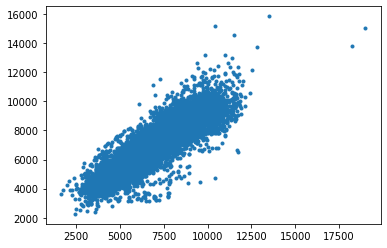

In [ ]:
plt.plot(y_test, y_pred,'.')
plt.show()

In [ ]:
data.describe()

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,...,VNST_OK,VNST_OR,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,VNST_WV
count,5.779700e+04,5.779700e+04,5.779700e+04,5.779700e+04,5.779700e+04,5.779700e+04,5.779700e+04,5.779700e+04,5.779700e+04,5.779700e+04,...,57797.000000,57797.000000,57797.000000,57797.000000,57797.000000,57797.000000,57797.000000,57797.000000,57797.000000,57797.000000
mean,-5.367304e-16,-1.303951e-16,1.051271e-16,1.058462e-15,-4.185259e-17,7.021814e-16,2.274420e-15,-3.667422e-15,1.297379e-14,-4.258407e-16,...,0.049968,0.002699,0.011627,0.058498,0.024361,0.186376,0.011956,0.022890,0.001921,0.003824
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.217881,0.051883,0.107200,0.234684,0.154169,0.389414,0.108687,0.149556,0.043782,0.061718
min,-2.432328e+00,-4.566859e+00,-2.497137e+00,-2.718493e+00,-2.698283e+00,-2.918180e+00,-2.528873e+00,-2.764066e+00,-2.851173e+00,-3.078890e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.820997e-01,-6.646247e-01,-7.544380e-01,-7.230517e-01,-7.040022e-01,-6.961542e-01,-7.608856e-01,-7.345444e-01,-7.224846e-01,-7.106557e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-9.869015e-02,1.281836e-01,-1.204916e-02,-2.287756e-02,-1.584816e-02,-1.630498e-02,-2.309022e-02,-2.312703e-02,-7.073758e-03,-8.956487e-03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.847194e-01,7.506444e-01,6.659613e-01,6.050301e-01,6.834205e-01,6.608782e-01,6.606799e-01,6.037581e-01,6.891685e-01,6.563223e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.818357e+00,3.031767e+00,1.205809e+01,1.087167e+01,9.711989e+00,9.370058e+00,1.220312e+01,1.102254e+01,9.845582e+00,9.383554e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import random
randomlist = []
for i in range(0,12):

  n = random.randint(1,5)
  randomlist.append(n)

In [ ]:
for i in range(0,100):

  n = random.randint(0,1)
  randomlist.append(n)

In [ ]:
new_y=regressor.predict(np.array(randomlist).reshape(1, -1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
len(randomlist)


112

In [ ]:
new_y

array([3751.46967096])